In [1]:
#We'll be using the same faces dataset as in Lab 3: here follows the same code to open and test out that data

In [68]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#load data

fea = pd.read_csv('faces_fea.csv',header=None)

# Data is saved in a dataframe 'fea' where rows are images (n=2414) and columns are pixels (m=32*32=1024)
# To plot the images as 2-D you first need to reshape each column (1-D) into a 2-D matrix
# This is done for you below in the examples that plot the images 

In [4]:
#open up data to see what we're working with -- note that pixel values range from 0 to 255

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,82,81,72,72,40,93,119,129,135,121,...,91,89,92,75,80,67,57,35,33,22
1,86,86,74,67,47,66,87,101,118,132,...,89,82,87,69,60,57,41,20,14,9
2,76,88,80,62,60,20,22,40,75,137,...,80,73,70,52,37,37,16,9,6,6
3,15,16,22,11,23,8,7,7,6,4,...,14,12,9,11,9,10,7,7,5,5
4,70,69,48,64,46,109,138,147,136,102,...,94,88,83,65,74,78,66,45,39,34


In [5]:
#normalize data to range from 0 to 1; recheck what it looks like

fea/=fea.max().max()

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.321569,0.317647,0.282353,0.282353,0.156863,0.364706,0.466667,0.505882,0.529412,0.474510,...,0.356863,0.349020,0.360784,0.294118,0.313725,0.262745,0.223529,0.137255,0.129412,0.086275
1,0.337255,0.337255,0.290196,0.262745,0.184314,0.258824,0.341176,0.396078,0.462745,0.517647,...,0.349020,0.321569,0.341176,0.270588,0.235294,0.223529,0.160784,0.078431,0.054902,0.035294
2,0.298039,0.345098,0.313725,0.243137,0.235294,0.078431,0.086275,0.156863,0.294118,0.537255,...,0.313725,0.286275,0.274510,0.203922,0.145098,0.145098,0.062745,0.035294,0.023529,0.023529
3,0.058824,0.062745,0.086275,0.043137,0.090196,0.031373,0.027451,0.027451,0.023529,0.015686,...,0.054902,0.047059,0.035294,0.043137,0.035294,0.039216,0.027451,0.027451,0.019608,0.019608
4,0.274510,0.270588,0.188235,0.250980,0.180392,0.427451,0.541176,0.576471,0.533333,0.400000,...,0.368627,0.345098,0.325490,0.254902,0.290196,0.305882,0.258824,0.176471,0.152941,0.133333


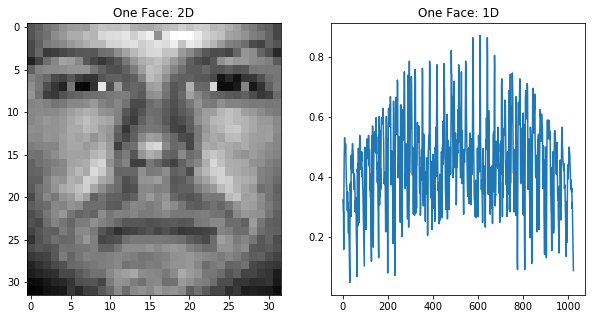

In [12]:
#plot a face

faceW = 32 #number of pixels in image width
faceH = 32 #number of pixels i|n image height
one_face = np.reshape(np.asarray(fea.iloc[0,:]),(faceH,faceW)).T

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(one_face,cmap='gray',aspect='auto')
plt.title('One Face: 2D')

plt.subplot(122)
plt.plot(fea.iloc[0,:])
plt.title('One Face: 1D')

plt.show()

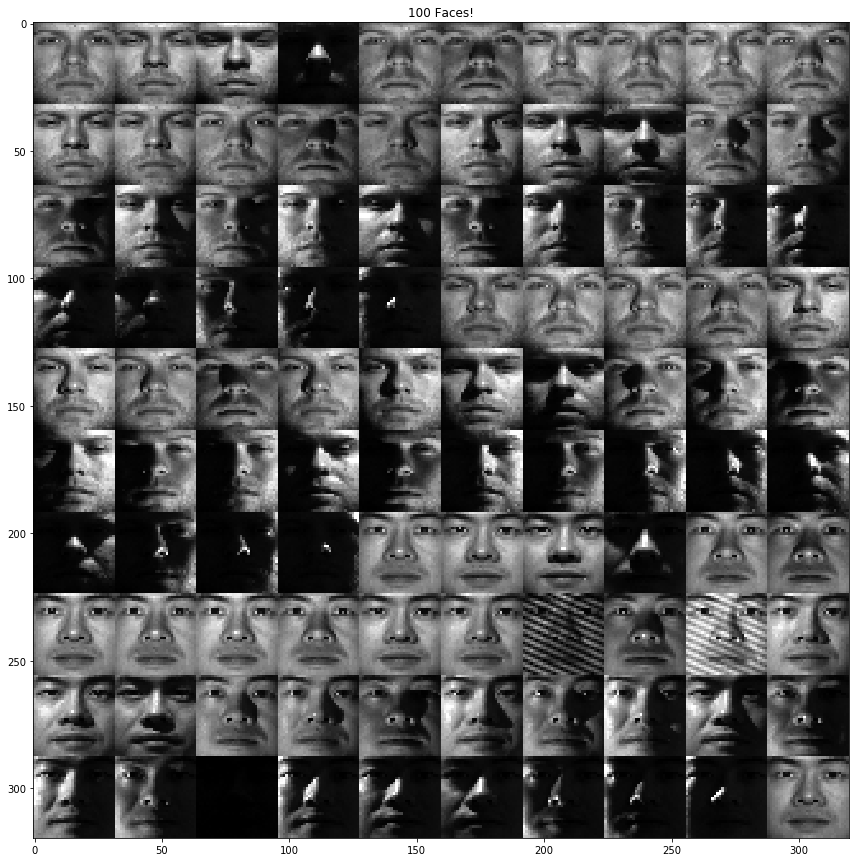

In [7]:
#plot 100 faces!

numPerLine = 10;
showLine = 10;

hundred_faces = np.empty((faceH*showLine,faceW*numPerLine))

kk = 0 
for ii in range(showLine):
    for jj in range(numPerLine):
        hundred_faces[ii*faceH:(ii+1)*faceH, jj*faceW:(jj+1)*faceW] = np.reshape(np.asarray(fea.iloc[kk,:]),(faceW,faceH)).T
        kk+=1
        
plt.figure(figsize=(15,15))
plt.imshow(hundred_faces,cmap='gray')
plt.title('100 Faces!')
plt.show()

# SOLUTIONS

## Q1: What is the spectrum of this 1-D face? 

In [34]:
x = fea.iloc[0,:] #first image as a vector
N = len(x) #number of points
dx = 1 #spatial sampling interval
L = N #length of the series

In [51]:
xfft = np.fft.fft(x)
#Sx2n = np.abs(xfft**2) #power spectra
Sx2n = np.abs(np.square(xfft))
freq = np.fft.fftfreq(np.arange(len(xfft)).shape[-1]) #frequency

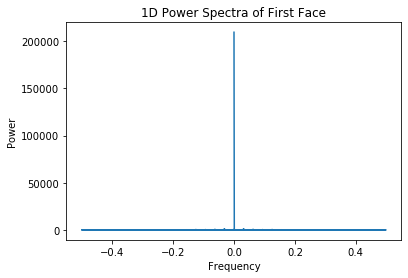

In [52]:
#plot it!  Is it useful?

plt.plot(freq,Sx2n)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('1D Power Spectra of First Face')
plt.show()

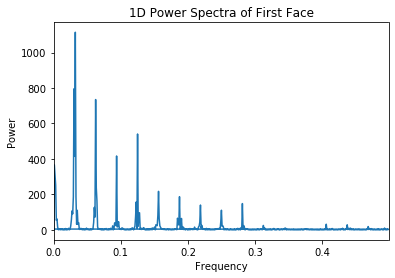

In [53]:
#notice that the power in the spectra is dominated by the zero-frequency (ie: the mean value of the image)
#remove power at zero-frequency, and plot positive frequencies only (since symmetric)

Sx2n[np.argmax(Sx2n)]=0

plt.plot(freq,Sx2n)
plt.xlim((0,np.max(freq)))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('1D Power Spectra of First Face')
plt.show()

## Q2: What is 2-D spectrum of the 2-D face (first face in the dataset)?

In [57]:
Nx = 32
Ny = 32
dx = 1
dy = 1
Lx = 32
Ly = 32

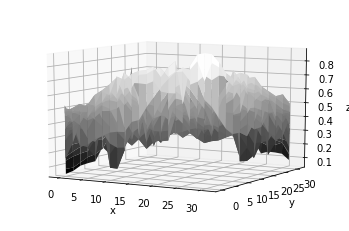

In [137]:
#let's first plot the 1st face in 3-D (as a topography); this is easier to see the 'wavelengths'

face = np.reshape(np.asarray(fea.iloc[0,:]),(Nx,Ny)).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X=np.arange(Nx),Y=np.arange(Ny),Z=face,cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.azim=-60
ax.elev = 10
plt.show()

In [146]:
#now, do FFT in 2D

x2d = face

x2dfft = np.fft.fft2(x2d)
#Sx2n = np.abs(xfft**2) #power spectra
Sx2n = np.abs(np.square(x2dfft))
freq = np.fft.fftfreq(np.arange(len(x2dfft)).shape[-1]) #frequency
Sx2n[0,0]=0

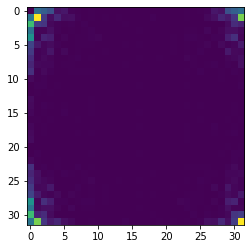

In [152]:
plt.imshow(Sx2n)

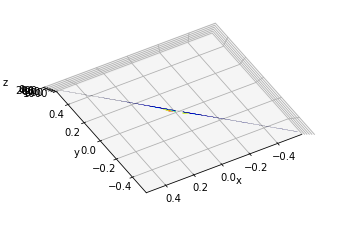

In [141]:
np.shape(freq)

(32,)

In [145]:
face

array([[0.32156863, 0.36470588, 0.42352941, ..., 0.38039216, 0.36078431,
        0.27843137],
       [0.31764706, 0.37647059, 0.41568627, ..., 0.43137255, 0.36862745,
        0.2745098 ],
       [0.28235294, 0.35294118, 0.44313725, ..., 0.2627451 , 0.36470588,
        0.31764706],
       ...,
       [0.14117647, 0.16862745, 0.18823529, ..., 0.23529412, 0.21568627,
        0.1372549 ],
       [0.08235294, 0.09019608, 0.1254902 , ..., 0.2       , 0.21568627,
        0.12941176],
       [0.04705882, 0.06666667, 0.10196078, ..., 0.14509804, 0.13333333,
        0.08627451]])